## Task 1, 2

In [1]:
!gdown 1OwEm0HUJmQ7GkIoInlvWiBBsLr7cyjAO

Downloading...
From: https://drive.google.com/uc?id=1OwEm0HUJmQ7GkIoInlvWiBBsLr7cyjAO
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 55.2MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Task 3

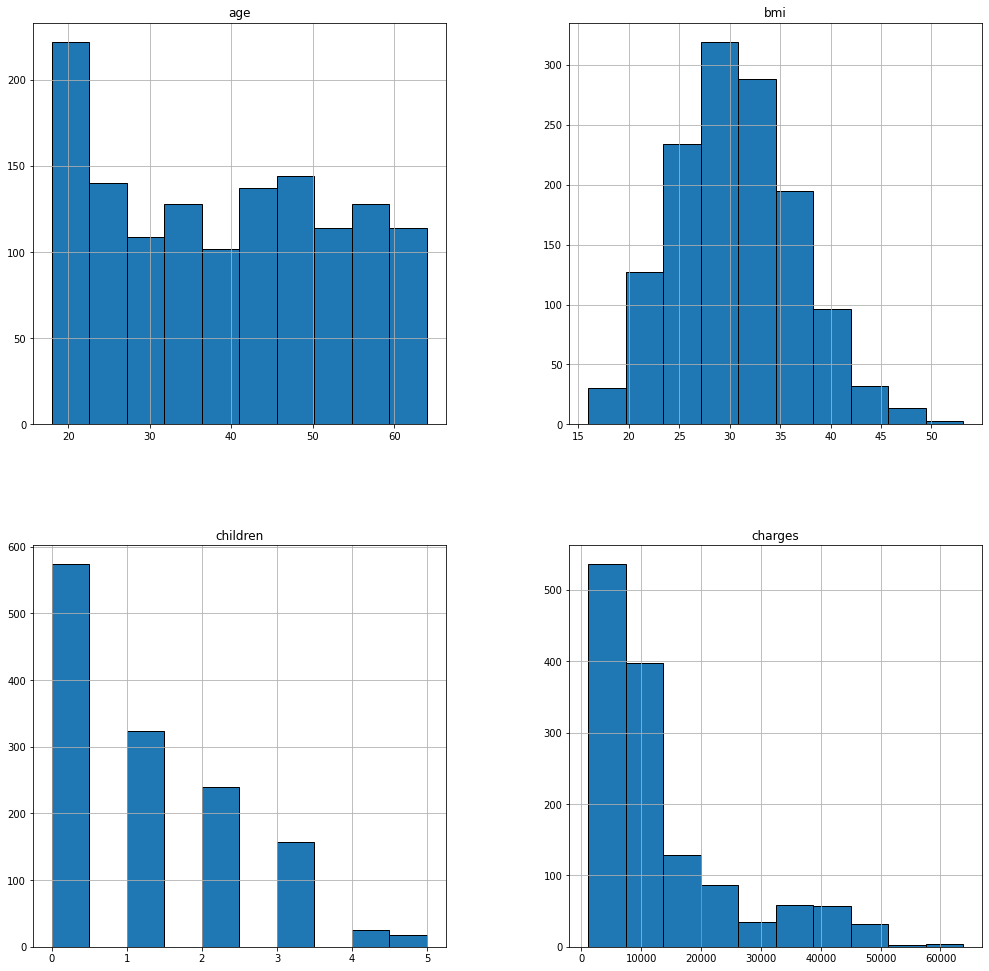

In [9]:
df.hist(figsize=(17,17), edgecolor='black');

## Task 4

In [10]:
def get_stats(name: str, data: pd.Series):
    mode = data.mode()[0]
    median = data.median()
    mean = data.mean()
    raz = data.max() - data.min()
    std = data.std()
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    print(f'Название: {name}:\nМода: {mode}, Медиана: {median}, Среднее: {mean}, Размах: {raz}, Стандартное отклонение: {std}, IQR: {iqr}')
    return mode, median, mean, raz, std, iqr


Название: bmi:
Мода: 32.3, Медиана: 30.4, Среднее: 30.66339686098655, Размах: 37.17, Стандартное отклонение: 6.098186911679014, IQR: 8.3975
Название: charges:
Мода: 1639.5631, Медиана: 9382.033, Среднее: 13270.422265141257, Размах: 62648.554110000005, Стандартное отклонение: 12110.011236694001, IQR: 11899.625365


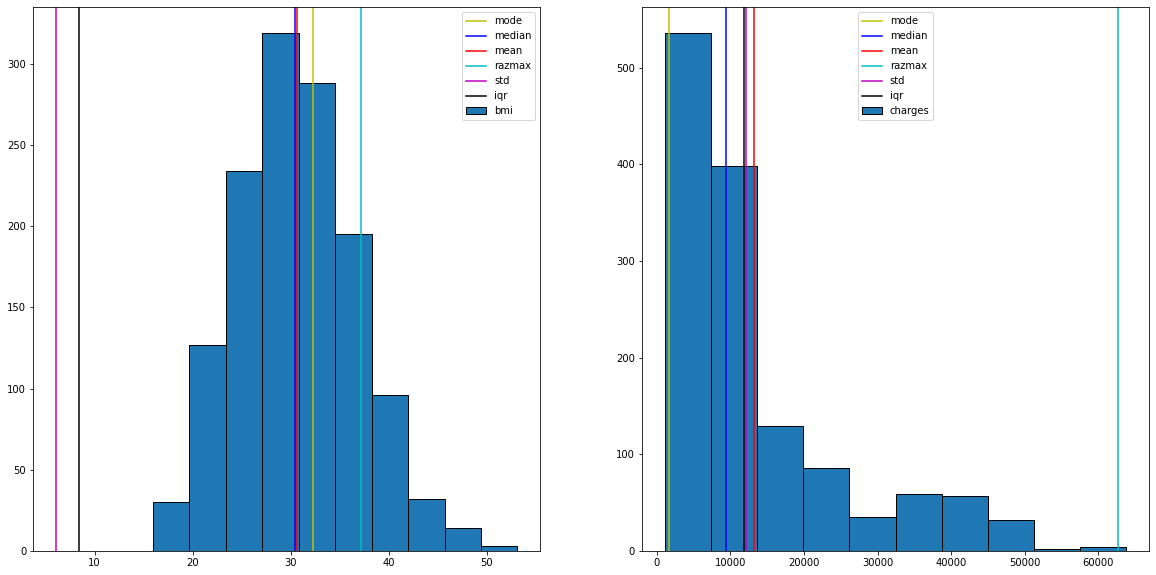

In [17]:
names = ['mode', 'median', 'mean', 'razmax', 'std', 'iqr']
colors = ['y', 'b', 'r', 'c', 'm', 'k']
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(df.bmi, edgecolor='black', label='bmi')
bmi_stats = get_stats('bmi', df.bmi)
for name, stat, color in zip(names, bmi_stats, colors):
    ax[0].axvline(x=stat, color=color, label=name)
ax[0].legend()

ax[1].hist(df.charges, edgecolor='black', label='charges')
charges_stats = get_stats('charges', df.charges)
for name, stat, color in zip(names, charges_stats, colors):
    ax[1].axvline(x=stat, color=color, label=name)

ax[1].legend()
plt.show()

## Task 5

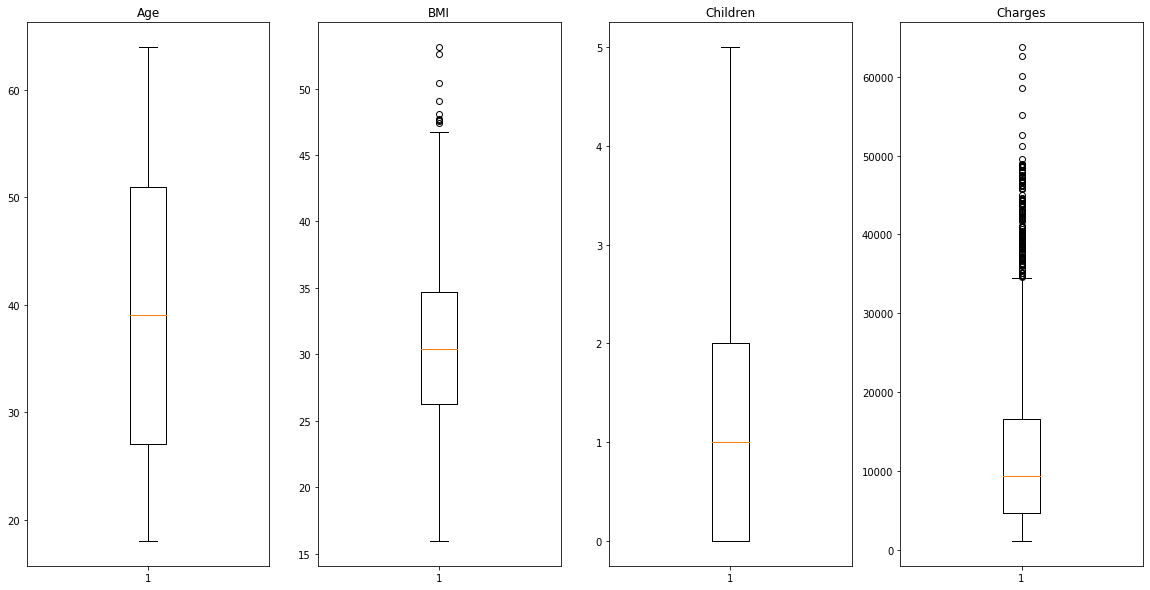

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(20,10))
ax[0].boxplot(df.age)
ax[0].set_title('Age')
ax[1].boxplot(df.bmi)
ax[1].set_title('BMI')
ax[2].boxplot(df.children)
ax[2].set_title('Children')
ax[3].boxplot(df.charges)
ax[3].set_title('Charges')

print()

## Task 6

In [21]:
def get_sample_means(data: pd.Series, size):
    sample_means = []
    for i in range(300):
        sample_means.append(data.sample(size).mean())
    return sample_means

In [ ]:
possible_sample_sizes = [100, 300, 600, 1000]
rez = []
for size in possible_sample_sizes:
    sample_means = get_sample_means(df.charges, size)
    std = np.std(sample_means)
    mean = np.mean(sample_means)
    rez.append([std, mean])
    print(f'Размер: {size}')
    print(f'Std: {std}')
    print(f'Mean: {std}\n')

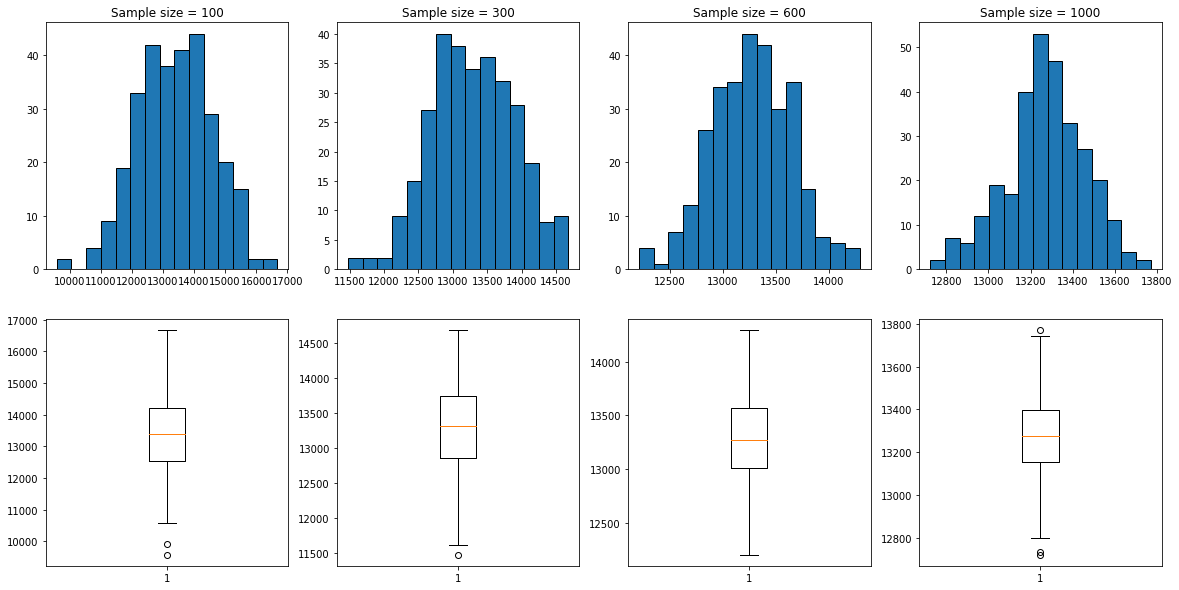

In [27]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))
i = 0
for size in possible_sample_sizes:
    sample = get_sample_means(df.charges, size)
    ax[0,i].hist(sample, bins=15, edgecolor='black')
    ax[0,i].set_title(f'Sample size = {size}')
    ax[1,i].boxplot(sample)
    i += 1

## Task 7

In [28]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = np.std(data) / math.sqrt(len(data))
    if confidence == 0.95:
        diff = 1.96 * se
    elif confidence == 0.99:
        diff = 2.58 * se
    return mean - diff, mean + diff

print('Доверительный интервал среднего значения charges (95%):',
      confidence_interval(df.charges, 0.95))
print('Доверительный интервал среднего значения charges (99%):',
      confidence_interval(df.charges, 0.99))
print('Доверительный интервал среднего значения bmi (95%):',
      confidence_interval(df.bmi, 0.95))
print('Доверительный интервал среднего значения bmi (99%):',
      confidence_interval(df.bmi, 0.99))

Доверительный интервал среднего значения charges (95%): (12621.772585885332, 13919.071944397181)
Доверительный интервал среднего значения charges (99%): (12416.58748326356, 14124.257047018953)
Доверительный интервал среднего значения bmi (95%): (30.336759097652553, 30.990034624320543)
Доверительный интервал среднего значения bmi (99%): (30.233434907210167, 31.09335881476293)


## Task 8

p for bmi: 0.31453976932347394
p for charges: 4.39305730768502e-42


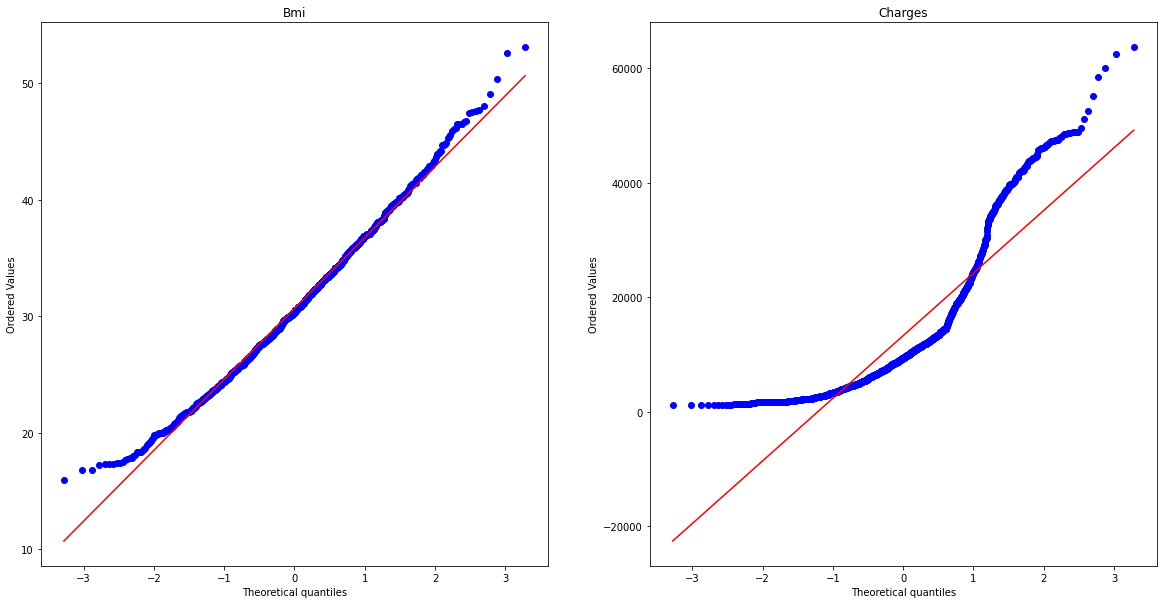

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
stats.probplot(df.bmi, plot=ax[0])
ax[0].set_title('Bmi')
stats.probplot(df.charges, plot=ax[1])
ax[1].set_title('Charges')

bmi_ks_test = stats.kstest(stats.zscore(df.bmi), 'norm')
charges_ks_test = stats.kstest(stats.zscore(df.charges), 'norm')
print('p for bmi:', bmi_ks_test[1])
print('p for charges:', charges_ks_test[1])